# Linear Regression:
It is based on Supervised Learning. It is  statistical method used for prediction and is applicable on continous numeric variables such as cost, age. Not categorical values.
## Types:
1. Linear Regression with Single variable.
2. Linear Regression with Multiple variables.

## For Term Insurance Data:
This line is called regression line or best fit line.
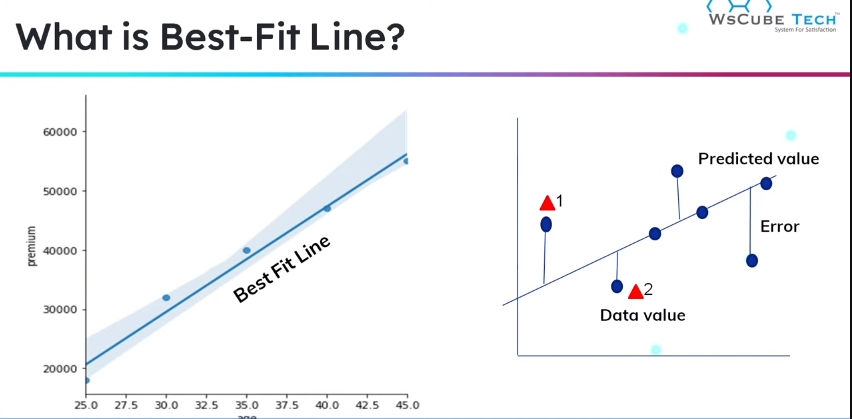

# Linear Regression with Single Variable:

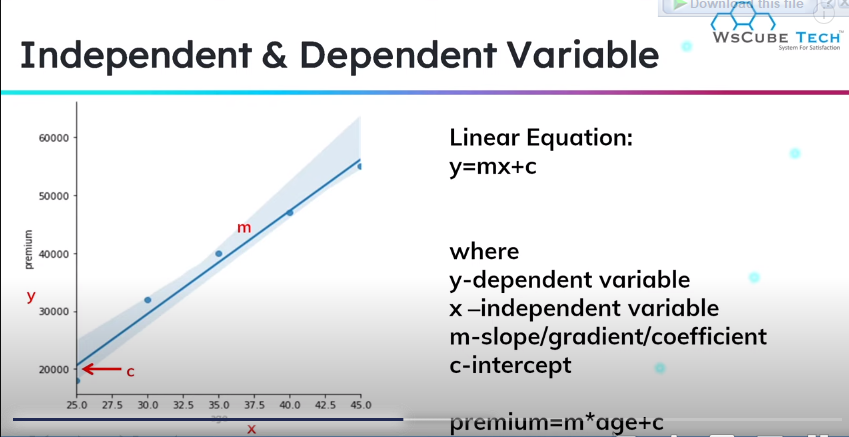
## Code:

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [3]:
df=pd.read_csv('TermInsuranceData.csv')
df

Age  Premium
0   25    18000
1   30    32000
2   35    42000
3   40    47000
4   45    55000

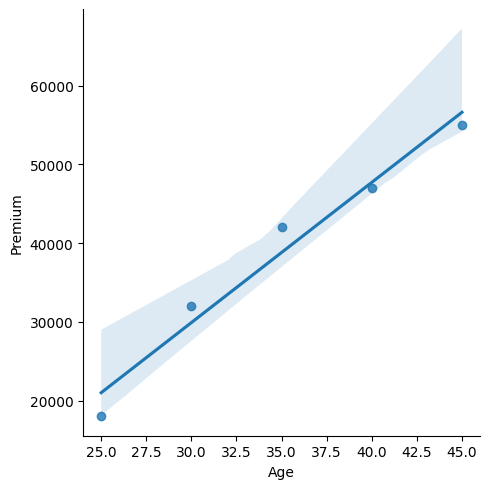

In [4]:
sns.lmplot(x='Age',y='Premium',data=df)

In [6]:
reg=linear_model.LinearRegression()
#first element should always be 2d
reg.fit(df[['Age']],df['Premium'])

LinearRegression()

In [9]:
reg.predict([[45]])

C:\Users\Chief Oggy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([56600.])

In [ ]:
m=reg.coef_
c=reg.intercept_

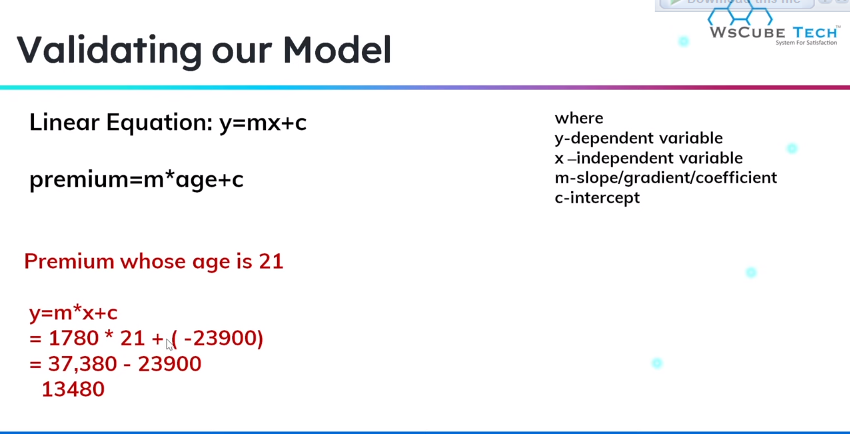

# Linear Regression with Multiple variables:

**Data should always be in contnous manner for implementing regression.**
1. Load Dataset
2. Check Missing value
   1. We can drop the row too but if there was too much low data.
   2. We can replace this value with the mean/median/mode of particular row or column.

In [11]:
import pandas as pd
from sklearn import linear_model

df=pd.read_csv("TermInsuranceData2.csv")
print(df.Height)
print(df.Height.mean())
df.Height=df.Height.fillna(df.Height.mean())

0    162.56
1    172.20
2    167.64
3       NaN
4    157.48
Name: Height, dtype: float64
164.97


In [12]:
df

Age  Height  Weight  Premium
0   25  162.56      70    18000
1   30  172.20      95    38000
2   35  167.64      78    38000
3   40  164.97     110    60000
4   45  157.48      85    70000

In [14]:
reg=linear_model.LinearRegression()
reg.fit(df[['Age','Height','Weight']],df['Premium'])

LinearRegression()

In [17]:
reg.predict([[25,162.56,70]])

C:\Users\Chief Oggy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18531.2004569])

## Polynomial Regression

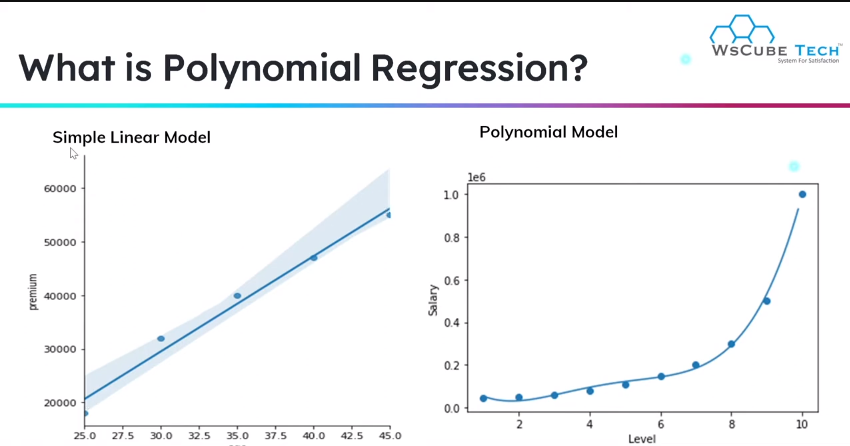
It is implemented when our data is in non-linear pattern. The data points are far away from each others.
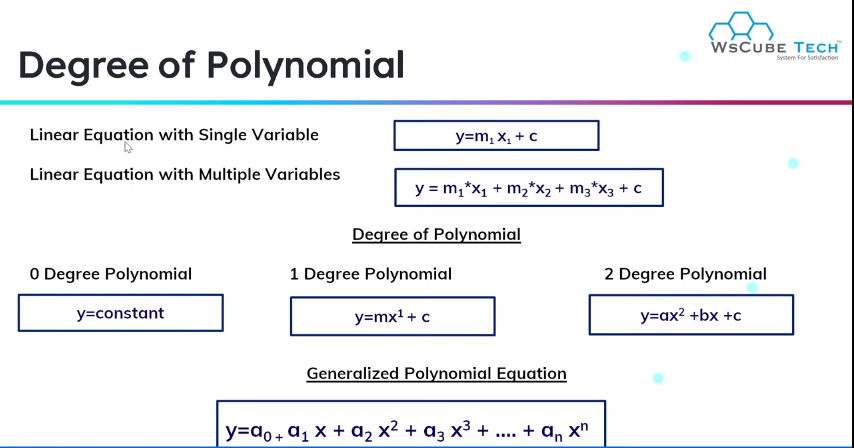

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("Position_Salaries.csv")
df

Position   Level   Salary
0   Business Analyst       1    45000
1  Junior Consultant       2    50000
2  Senior Consultant       3    60000
3            Manager       4    80000
4    Country Manager       5   110000
5     Region Manager       6   150000
6            Partner       7   200000
7     Senior Partner       8   300000
8            C-Level       9   500000
9                CEO      10  1000000

In [21]:
x=df.iloc[:,1:2].values # get all rows and columns including 1 and excluding 2
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [22]:
y=df.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

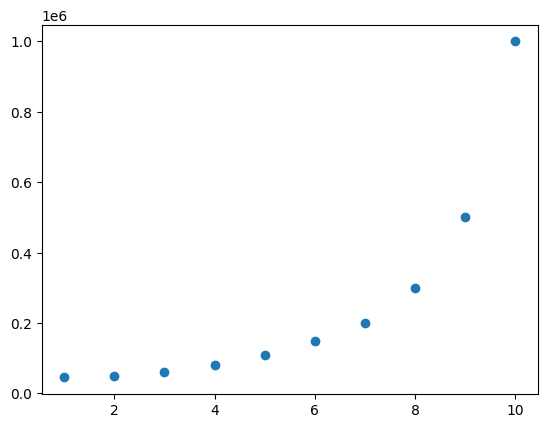

In [29]:
plt.scatter(x,y)

In [35]:
sns.lmplot(x="Level",y="Salary", data=df) #For making best fit line, idk why error

KeyError: "None of [Index(['Level', 'Salary'], dtype='object')] are in the [columns]"

In [36]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x,y)


LinearRegression()

In [39]:
reg.predict([[6.5]])

array([330378.78787879])

## This was through linear regression now lets add the feature for polynomial regression.

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2) #degree is the value of x

### Increasing the degree more may make the model to overfit

In [42]:
x_poly=poly.fit_transform(x)
reg2=linear_model.LinearRegression()
reg2.fit(x_poly,y)

LinearRegression()

In [45]:
reg2.predict(poly.fit_transform([[6.5]]))

array([189498.10606061])